# Imports

In [472]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker

# Data loading

In [453]:
#Loading data

df = pd.read_csv("../data/movie_metadata.csv")

# EDA

### 1. Examine the dataset

In [443]:
df.head()

color      director_name  num_critic_for_reviews  duration   
0  Color      James Cameron                   723.0     178.0  \
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name   
0                      0.0                   855.0  Joel David Moore  \
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...   
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...  \
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget   
0               3054.0  English      USA           PG-13  237000000.0  \
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio   
0      2009.0                  936.0        7.9          1.78  \
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [444]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [445]:
df.shape

(5043, 28)

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

We can see that our dataset has both numerical and categorical values. Some of our values are Null and we will have to fill them up, or delete rows where we are unable to do so.

Short summary of our numerical columns:

In [447]:
df.describe().T

count          mean           std      min   
num_critic_for_reviews     4993.0  1.401943e+02  1.216017e+02     1.00  \
duration                   5028.0  1.072011e+02  2.519744e+01     7.00   
director_facebook_likes    4939.0  6.865092e+02  2.813329e+03     0.00   
actor_3_facebook_likes     5020.0  6.450098e+02  1.665042e+03     0.00   
actor_1_facebook_likes     5036.0  6.560047e+03  1.502076e+04     0.00   
gross                      4159.0  4.846841e+07  6.845299e+07   162.00   
num_voted_users            5043.0  8.366816e+04  1.384853e+05     5.00   
cast_total_facebook_likes  5043.0  9.699064e+03  1.816380e+04     0.00   
facenumber_in_poster       5030.0  1.371173e+00  2.013576e+00     0.00   
num_user_for_reviews       5022.0  2.727708e+02  3.779829e+02     1.00   
budget                     4551.0  3.975262e+07  2.061149e+08   218.00   
title_year                 4935.0  2.002471e+03  1.247460e+01  1916.00   
actor_2_facebook_likes     5030.0  1.651754e+03  4.042439e+03     0.00   
imdb_score                 5043.0  6.442138e+00  1.125116e+00     1.60   
aspect_ratio               4714.0  2.220403e+00  1.385113e+00     1.18   
movie_facebook_likes       5043.0  7.525965e+03  1.932045e+04     0.00   

                                  25%          50%          75%           max  
num_critic_for_reviews          50.00       110.00       195.00  8.130000e+02  
duration                        93.00       103.00       118.00  5.110000e+02  
director_facebook_likes          7.00        49.00       194.50  2.300000e+04  
actor_3_facebook_likes         133.00       371.50       636.00  2.300000e+04  
actor_1_facebook_likes         614.00       988.00     11000.00  6.400000e+05  
gross                      5340987.50  25517500.00  62309437.50  7.605058e+08  
num_voted_users               8593.50     34359.00     96309.00  1.689764e+06  
cast_total_facebook_likes     1411.00      3090.00     13756.50  6.567300e+05  
facenumber_in_poster             0.00         1.00         2.00  4.300000e+01  
num_user_for_reviews            65.00       156.00       326.00  5.060000e+03  
budget                     6000000.00  20000000.00  45000000.00  1.221550e+10  
title_year                    1999.00      2005.00      2011.00  2.016000e+03  
actor_2_facebook_likes         281.00       595.00       918.00  1.370000e+05  
imdb_score                       5.80         6.60         7.20  9.500000e+00  
aspect_ratio                     1.85         2.35         2.35  1.600000e+01  
movie_facebook_likes             0.00       166.00      3000.00  3.490000e+05

### 2. Deal with missing values

First of all we check how many missing values are in each column

In [448]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

From this table we can see that some columns are missing few values compared to others. We can throw out the ones, where the number is relatively small or we cannot fill them. For example we wont be able to fill in actor_1_name and we can throw it out. On the other hand we see that a lot of movies are missing the gross metric and we can fill it as average.

In [454]:
# Removing values with small counts or categorical values

df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name',
                         'actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country',
                         'actor_2_facebook_likes','plot_keywords', 'color', 'content_rating', 'aspect_ratio'],inplace=True)

Now we will fill in numerical data:

In [455]:
# Filling in the budget column with median value
df["budget"].fillna(df["budget"].median(),inplace=True)

In [456]:
# Filling in the gross column with median value
df['gross'].fillna(df['gross'].median(),inplace=True)

In [457]:
# Removing duplicates from the dataset and checking the final size
df.drop_duplicates(inplace=True)
df.shape

(4371, 28)

### 3. Further examination 

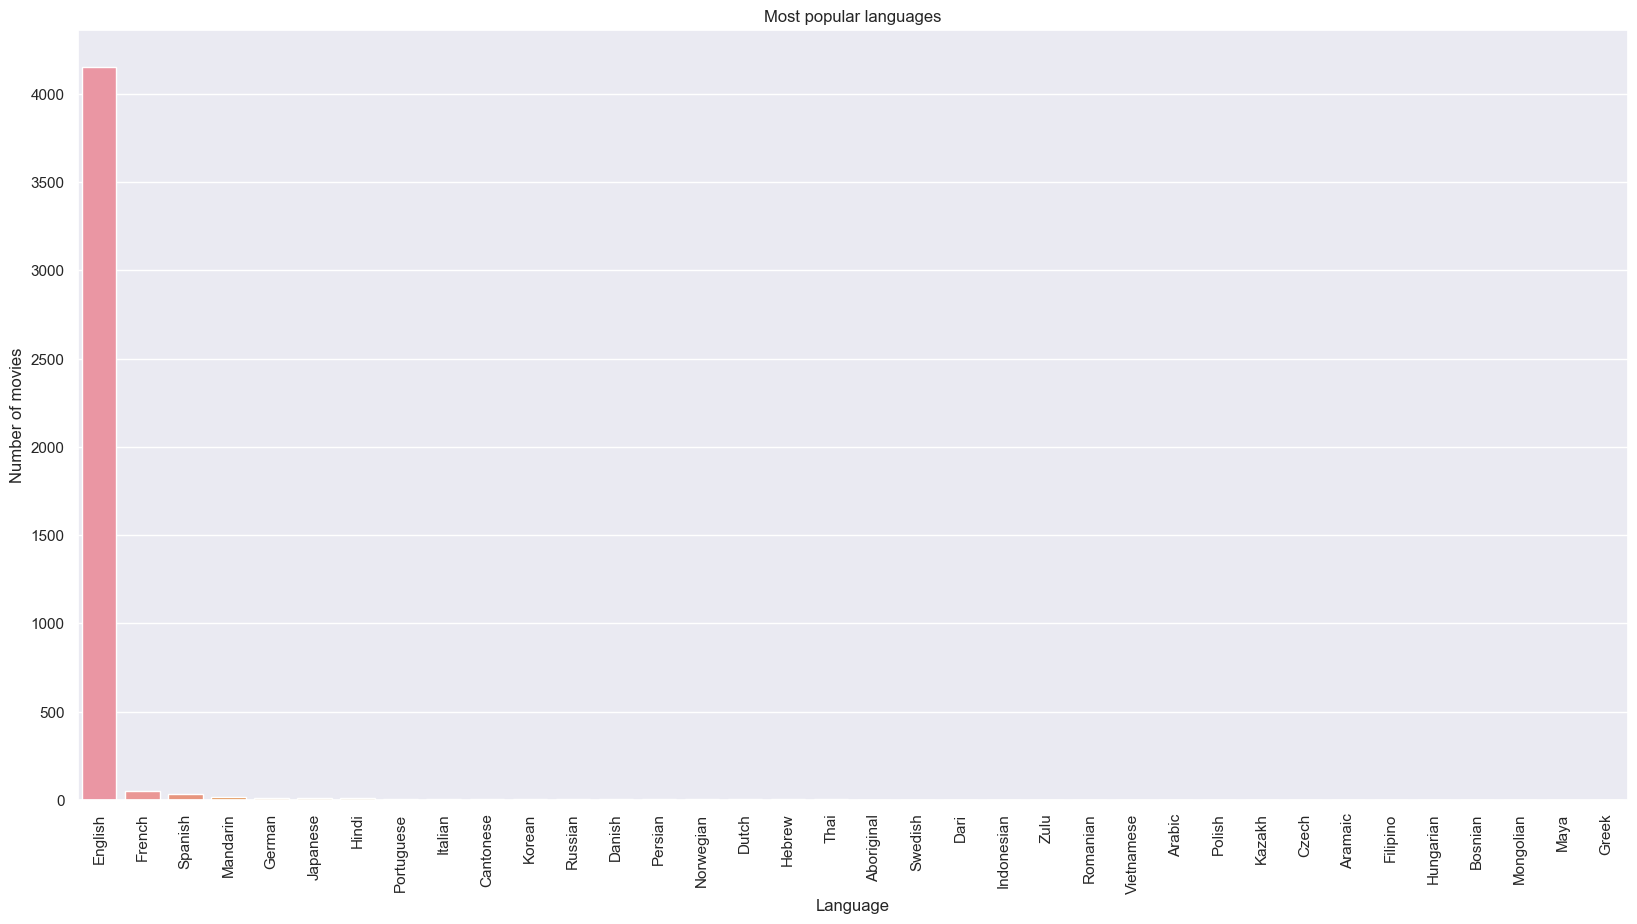

In [462]:
# Counting languages of the movies

df['language'].value_counts()

languages = df['language'].value_counts()

plt.figure(figsize=(20, 10))
sns.barplot(x=languages.index, y=languages.values)
plt.xlabel('Language')
plt.ylabel('Number of movies')
plt.title("Most popular languages")
plt.xticks(rotation=90) 
plt.show()

Most of the values are in english language, so this column is irrelevant to us and we can drop it later.

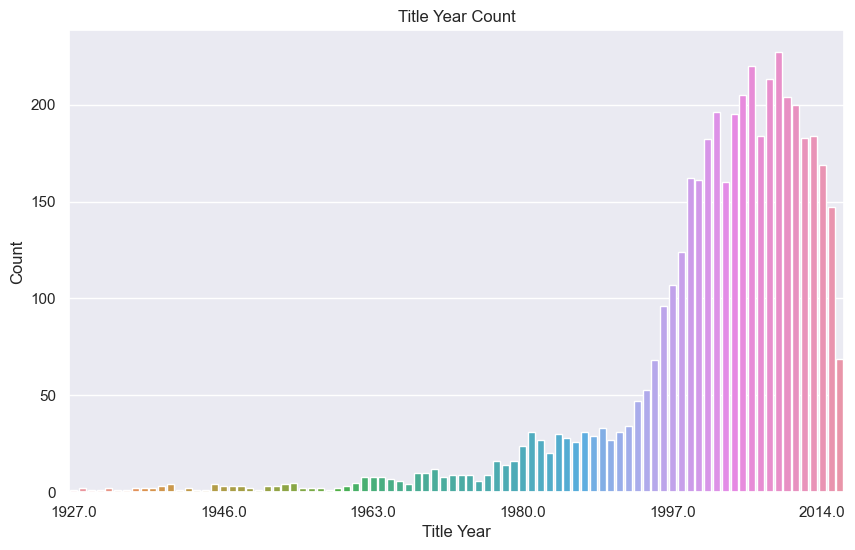

In [475]:
plt.figure(figsize=(10, 6))
sns.countplot(x='title_year', data=df)
plt.xlabel('Title Year')
plt.ylabel('Count')
plt.title('Title Year Count')

# Manually set tick values for x-axis
num_ticks = 5
x_ticks = plt.xticks()[0]
step = len(x_ticks) // num_ticks
plt.xticks(x_ticks[::step])


plt.show()

From this plot we can see that most of the movies were made after 1980s and for some reason started declining after ~2010s.

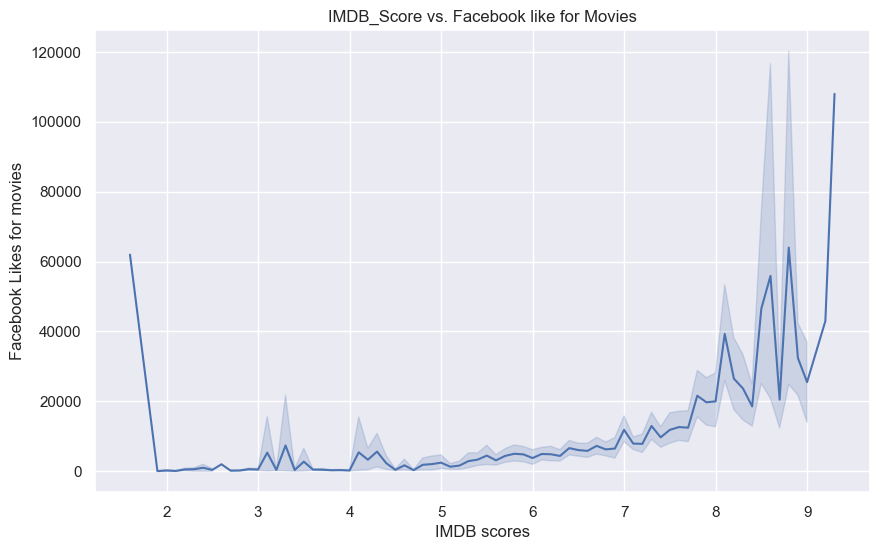

In [466]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='imdb_score', y='movie_facebook_likes', data=df)
plt.title('IMDB_Score vs. Facebook like for Movies')
plt.xlabel('IMDB scores')
plt.ylabel('Facebook Likes for movies')
plt.show()

<Axes: xlabel='imdb_score', ylabel='Count'>

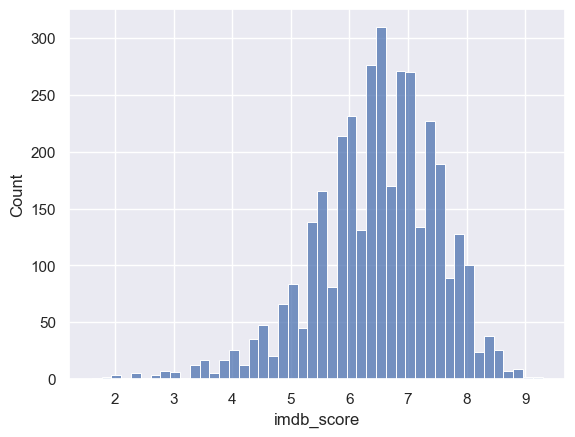

In [46]:
sns.histplot(df['imdb_score'])

In [395]:
# Searching for the most popualar directors
df['director_name'].nunique()

1658

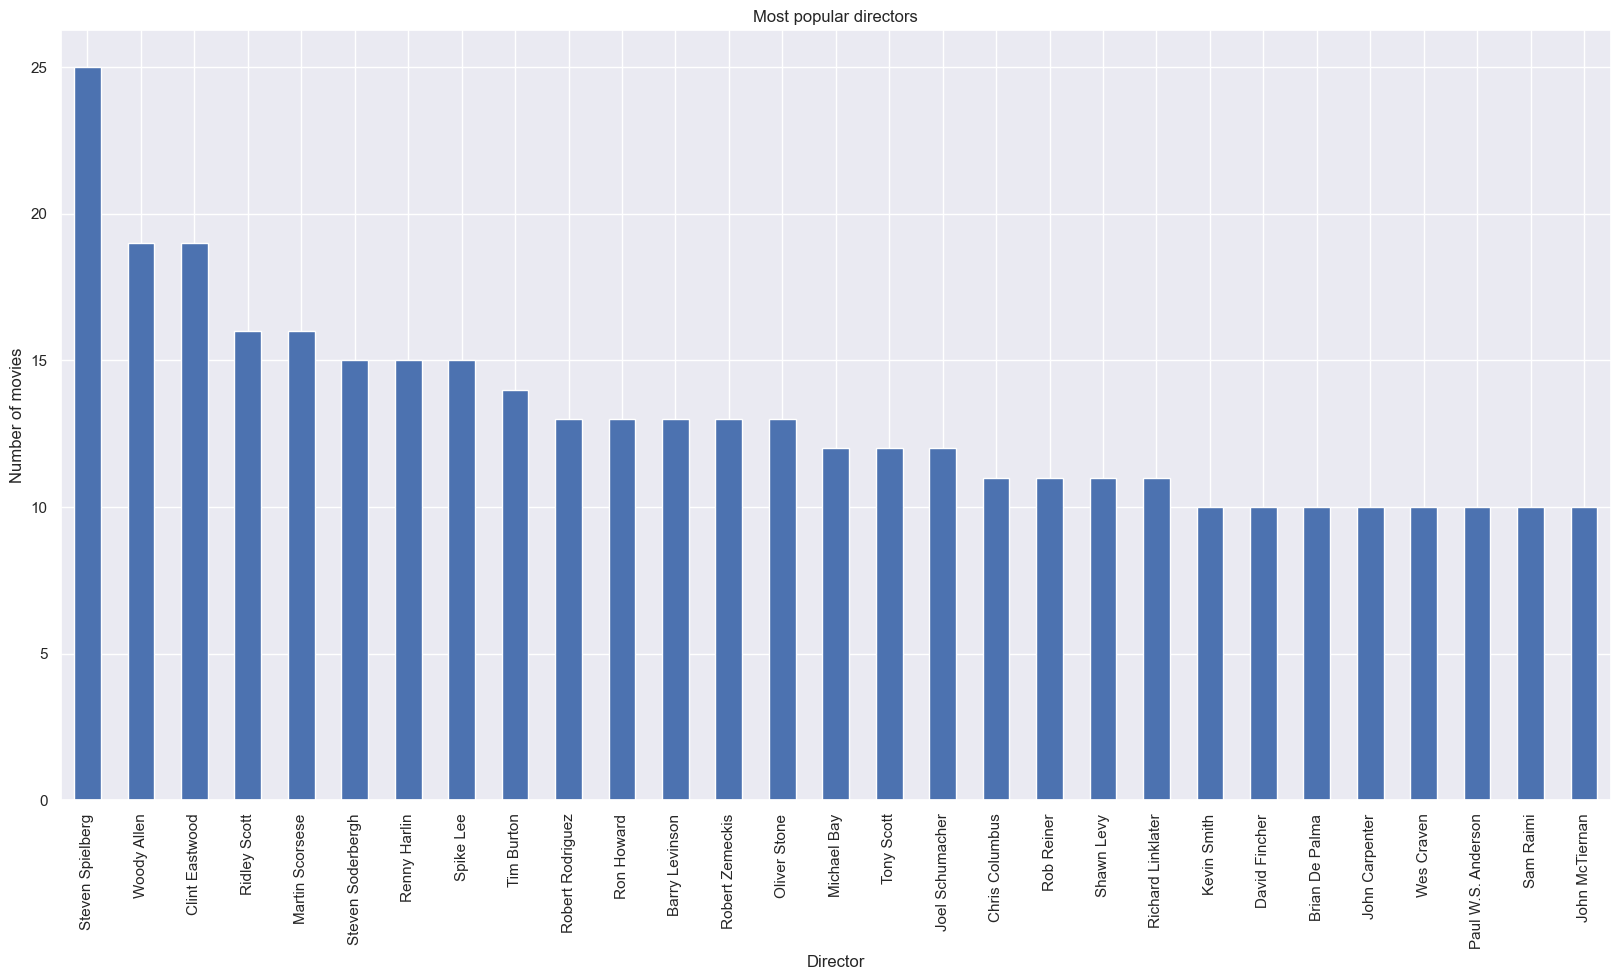

In [396]:
produced_movies = df['director_name'].value_counts()

plt.figure(figsize=(20, 10))
produced_movies[produced_movies >= 10].plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.title("Most popular directors")
plt.show()

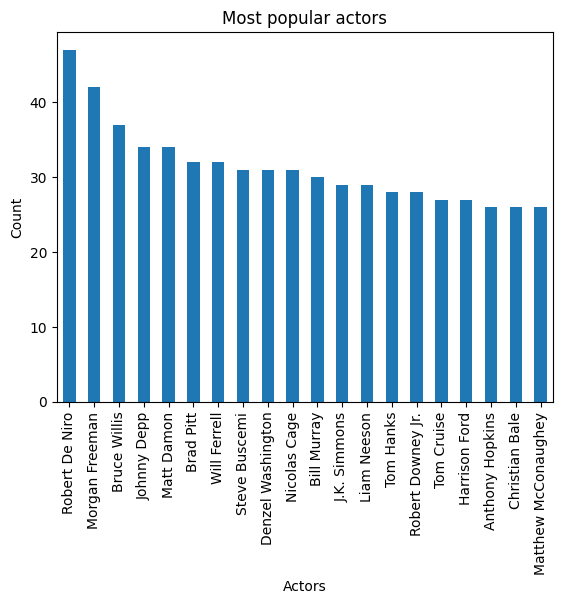

In [17]:
# Searching for the most popular actors
actors_df = df[['actor_1_name', 'actor_2_name', 'actor_3_name']]

actors_df = actors_df.values.flatten()
value_counts = pd.Series(actors_df).value_counts()
value_counts = value_counts[value_counts > 25]

# Plot the value counts
value_counts.plot(kind='bar')

# Set the plot title and labels
plt.title('Most popular actors')
plt.xlabel('Actors')
plt.ylabel('Count')

# Display the plot
plt.show()


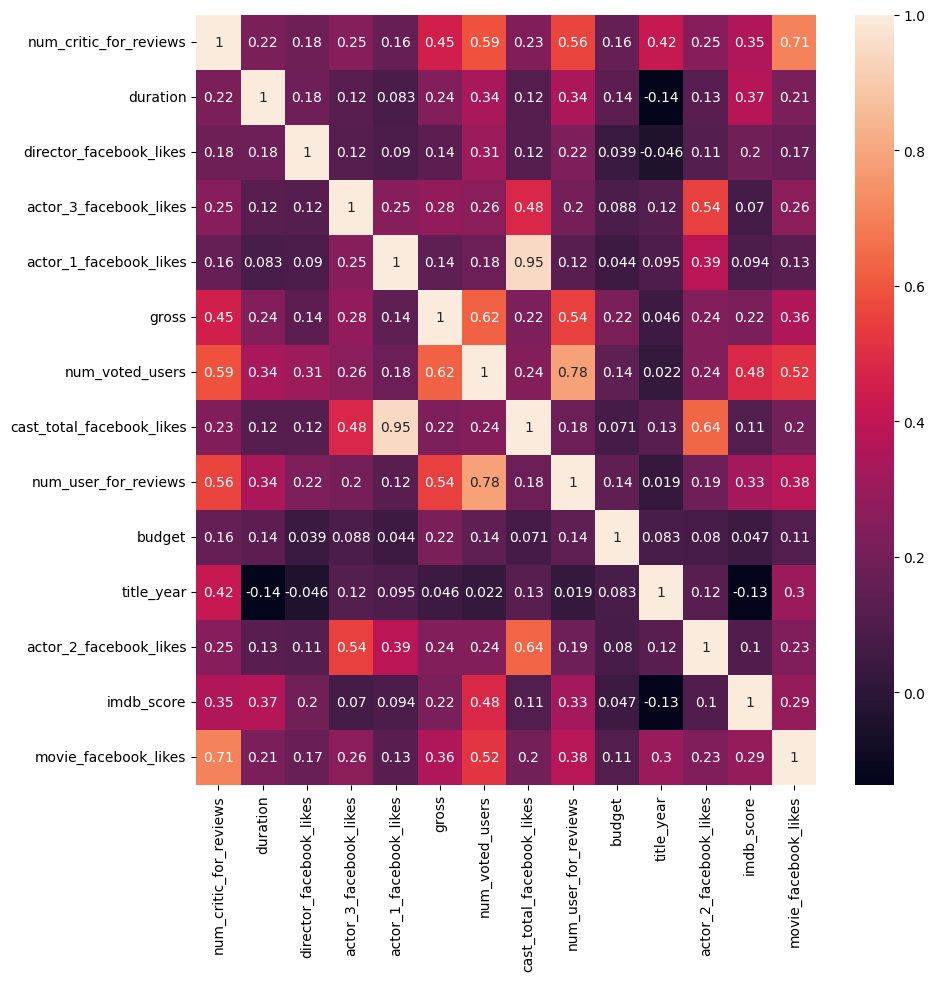

In [36]:
columns = ['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes']

heatmap_df = df[columns]

plt.figure(figsize=(10, 10))
corr = heatmap_df.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

c:\Users\Rokas\Desktop\capstone_project\.venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


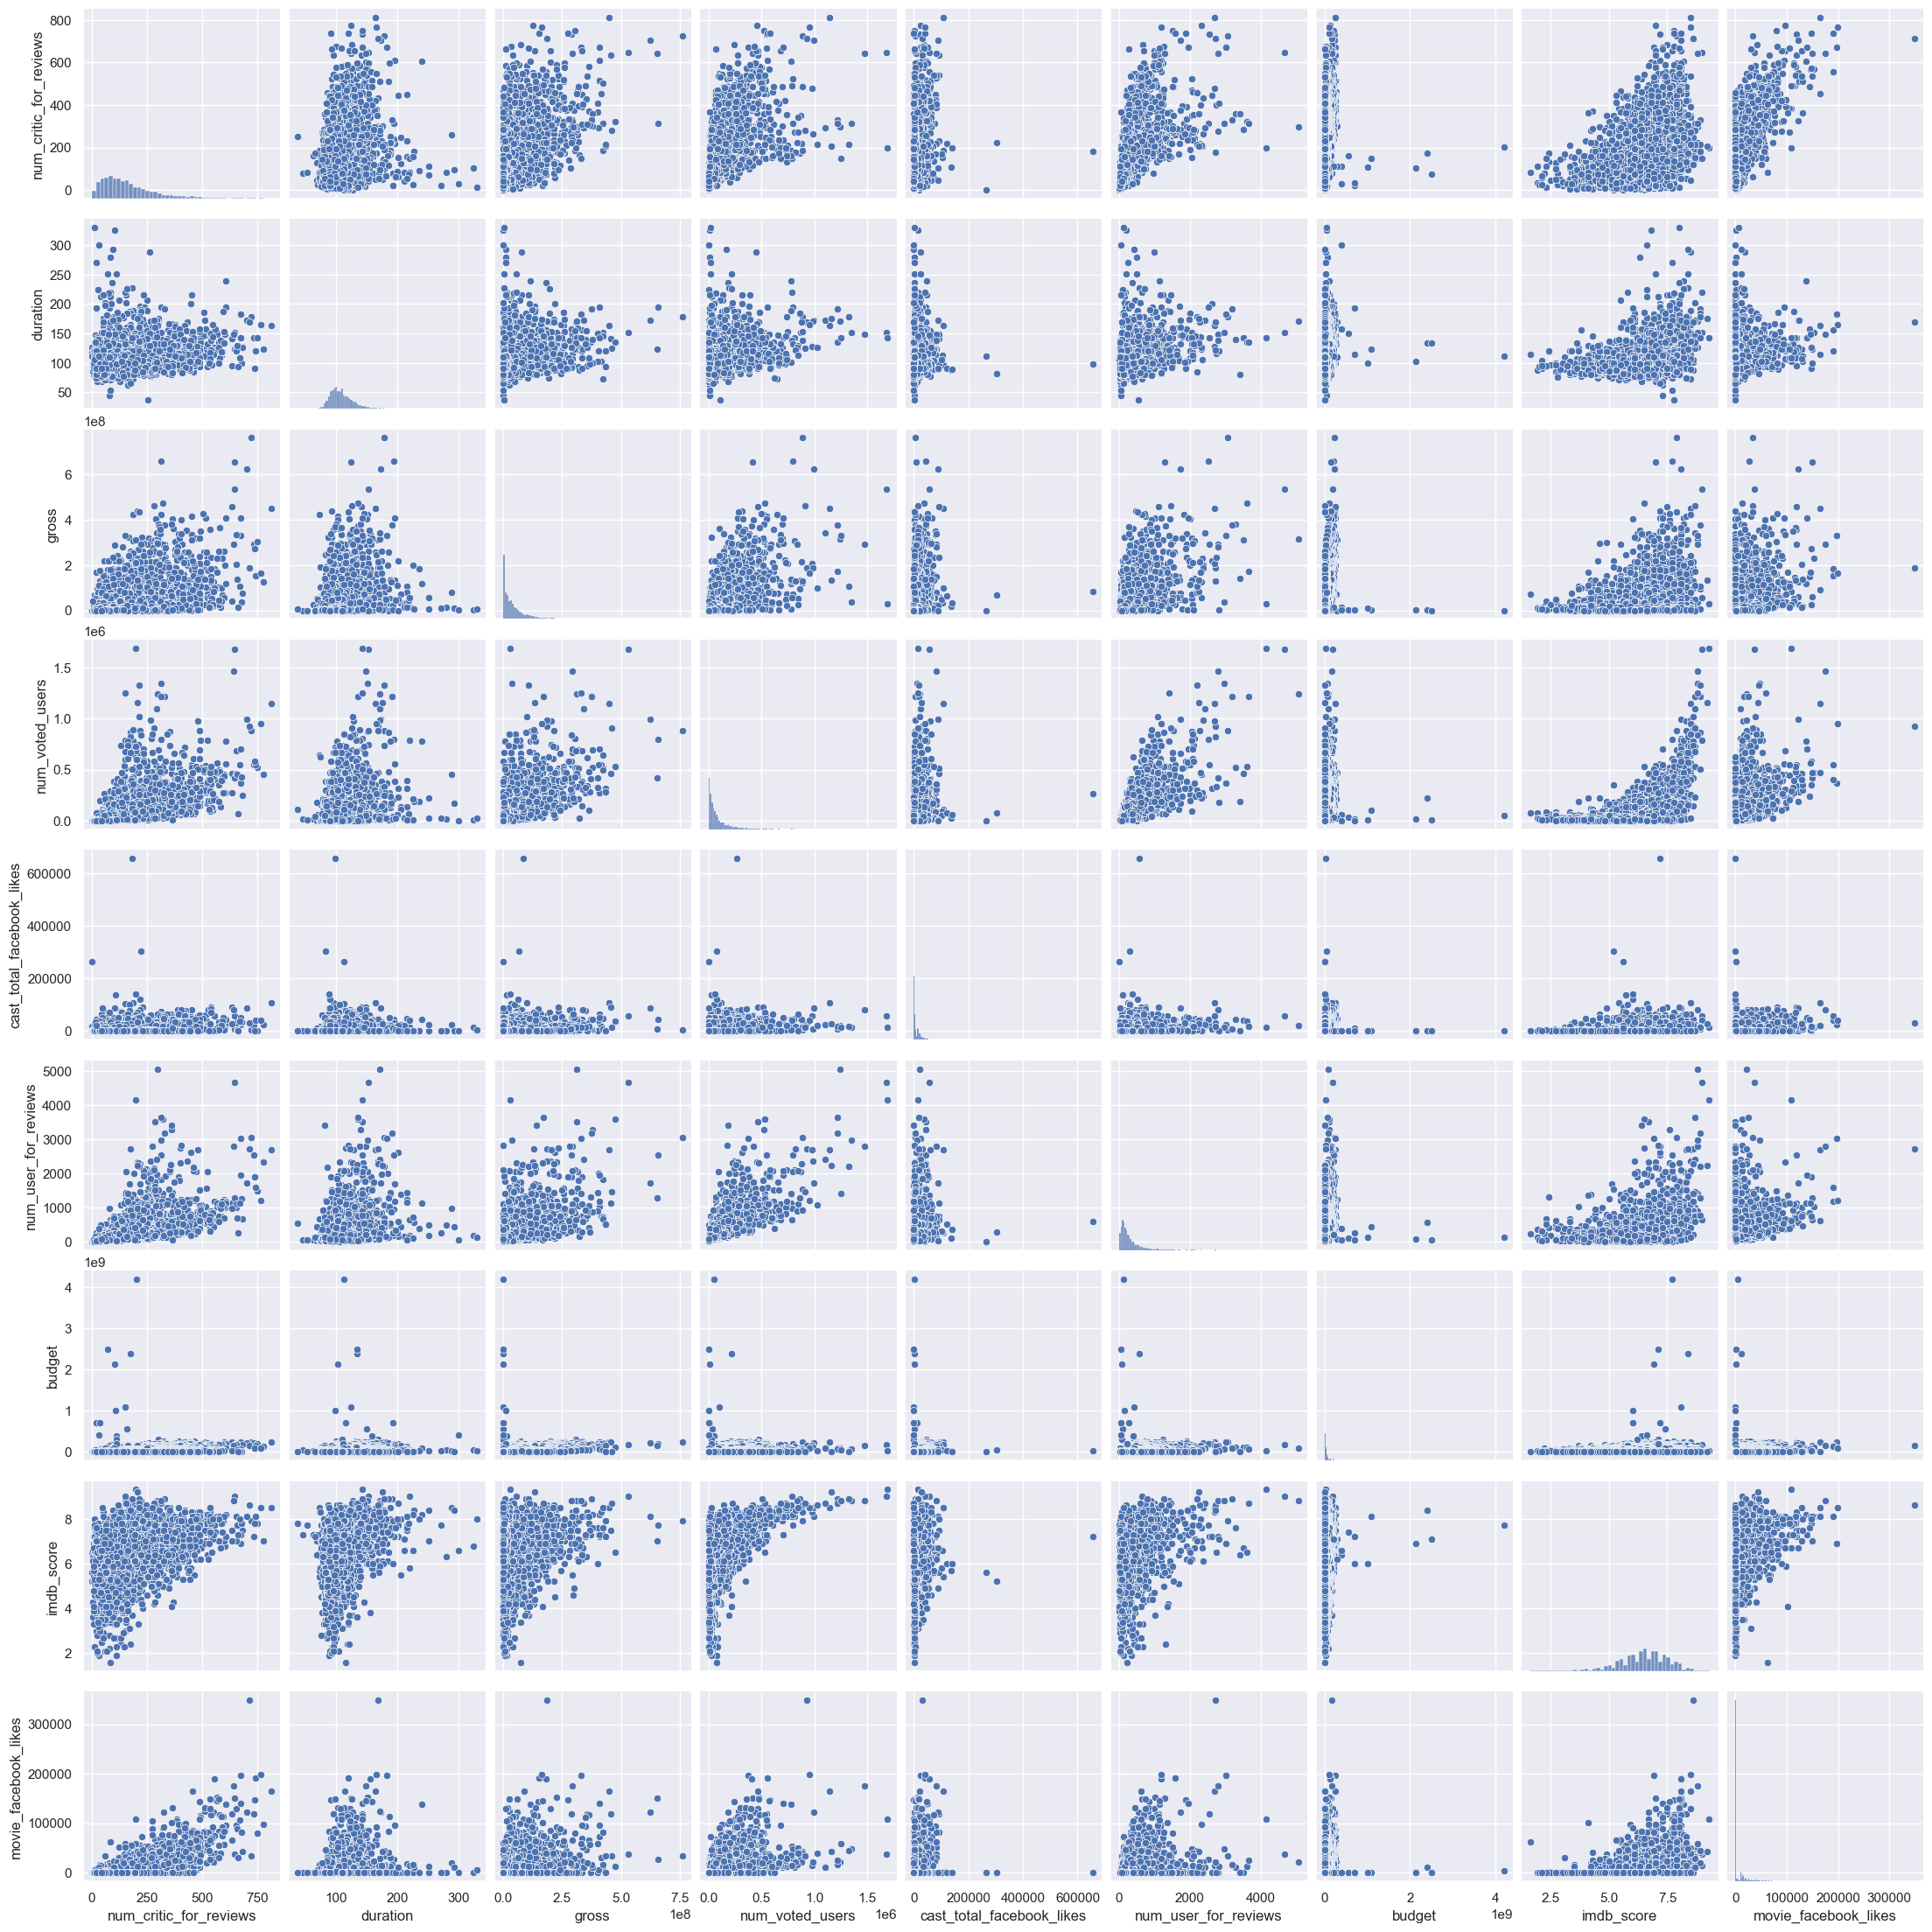

In [133]:
sns.set()
cols = ['num_critic_for_reviews', 'duration',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'budget', 'imdb_score', 'movie_facebook_likes']
sns.pairplot(df[cols], size = 2.5)
plt.show()

# Data Preprocessing and Feature Engineering

In [397]:
# Calculate the number of movies each director has made
director_counts = df['director_name'].value_counts()

# Create a dictionary mapping actor names to their number of movie appearances
director_dict = dict(director_counts)

# Create a new column 'actor_group'
def assign_actor_group(x):
    if director_dict[x['director_name']] > 18:
        return 7
    elif 15 <= director_dict[x['director_name']] < 18:
        return 6
    elif 12 <= director_dict[x['director_name']] < 15:
        return 5
    elif 8 <= director_dict[x['director_name']] < 12:
        return 4
    elif 4 <= director_dict[x['director_name']] < 8:
        return 3
    elif 2 <= director_dict[x['director_name']] < 4:
        return 2
    else:
        return 1

df['director_group'] = df.apply(assign_actor_group, axis=1)

In [415]:
# Calculate the number of movies each actor has starred in
actor_counts = df['actor_1_name'].value_counts()

# Create a dictionary mapping actor names to their number of movie appearances
actor_dict = dict(actor_counts)

# Create a new column 'actor_group'
def assign_actor_group(x):
    if actor_dict[x['actor_1_name']] > 31:
        return 3
    elif actor_dict[x['actor_1_name']] >= 15:
        return 2
    else:
        return 1

df['actor_1_group'] = df.apply(assign_actor_group, axis=1)

# Calculate the number of movies each actor has starred in
actor_counts = df['actor_2_name'].value_counts()

# Create a dictionary mapping actor names to their number of movie appearances
actor_dict = dict(actor_counts)

# Create a new column 'actor_group'
def assign_actor_group(x):
    if actor_dict[x['actor_2_name']] > 29:
        return 3
    elif actor_dict[x['actor_2_name']] >= 10:
        return 2
    else:
        return 1

df['actor_2_group'] = df.apply(assign_actor_group, axis=1)

# Calculate the number of movies each actor has starred in
actor_counts = df['actor_3_name'].value_counts()

# Create a dictionary mapping actor names to their number of movie appearances
actor_dict = dict(actor_counts)

# Create a new column 'actor_group'
def assign_actor_group(x):
    if actor_dict[x['actor_3_name']] > 15:
        return 3
    elif actor_dict[x['actor_3_name']] >= 3:
        return 2
    else:
        return 1

df['actor_3_group'] = df.apply(assign_actor_group, axis=1)

C:\Users\Rokas\AppData\Local\Temp\ipykernel_11840\114287328.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actor_1_group'] = df.apply(assign_actor_group, axis=1)
C:\Users\Rokas\AppData\Local\Temp\ipykernel_11840\114287328.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actor_2_group'] = df.apply(assign_actor_group, axis=1)
C:\Users\Rokas\AppData\Local\Temp\ipykernel_11840\114287328.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

### Cleaning outliers

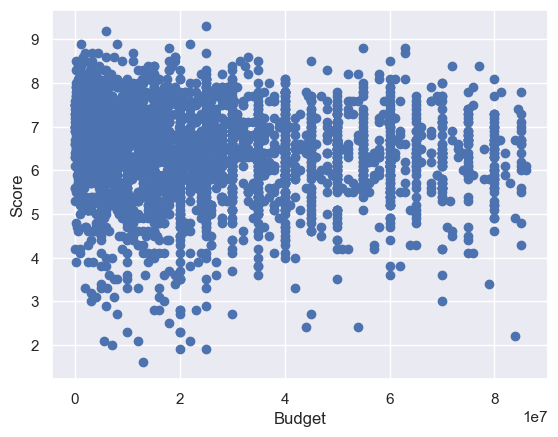

In [413]:
Q1 = df['budget'].quantile(0.25)
Q3 = df['budget'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the budget column in the original dataframe
df = df[(df['budget'] >= lower_bound) & (df['budget'] <= upper_bound)]

# Plot the budget vs score
plt.scatter(df['budget'], df['imdb_score'])
plt.xlabel('Budget')
plt.ylabel('Score')
plt.show()


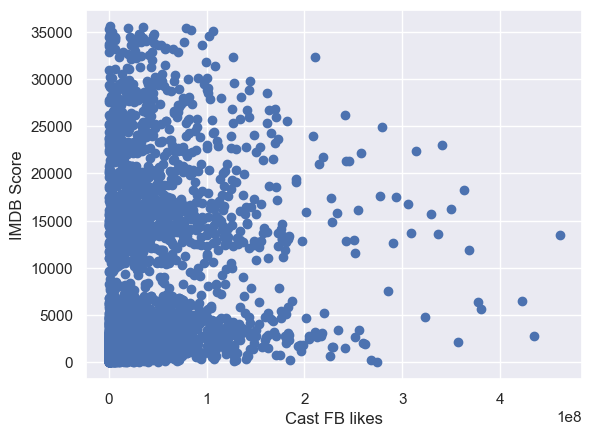

In [401]:
Q1 = df['cast_total_facebook_likes'].quantile(0.25)
Q3 = df['cast_total_facebook_likes'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the budget column in the original dataframe
df = df[(df['cast_total_facebook_likes'] >= lower_bound) & (df['cast_total_facebook_likes'] <= upper_bound)]

plt.scatter(df['gross'], df['cast_total_facebook_likes'])
plt.xlabel('Cast FB likes')
plt.ylabel('IMDB Score')
plt.show()

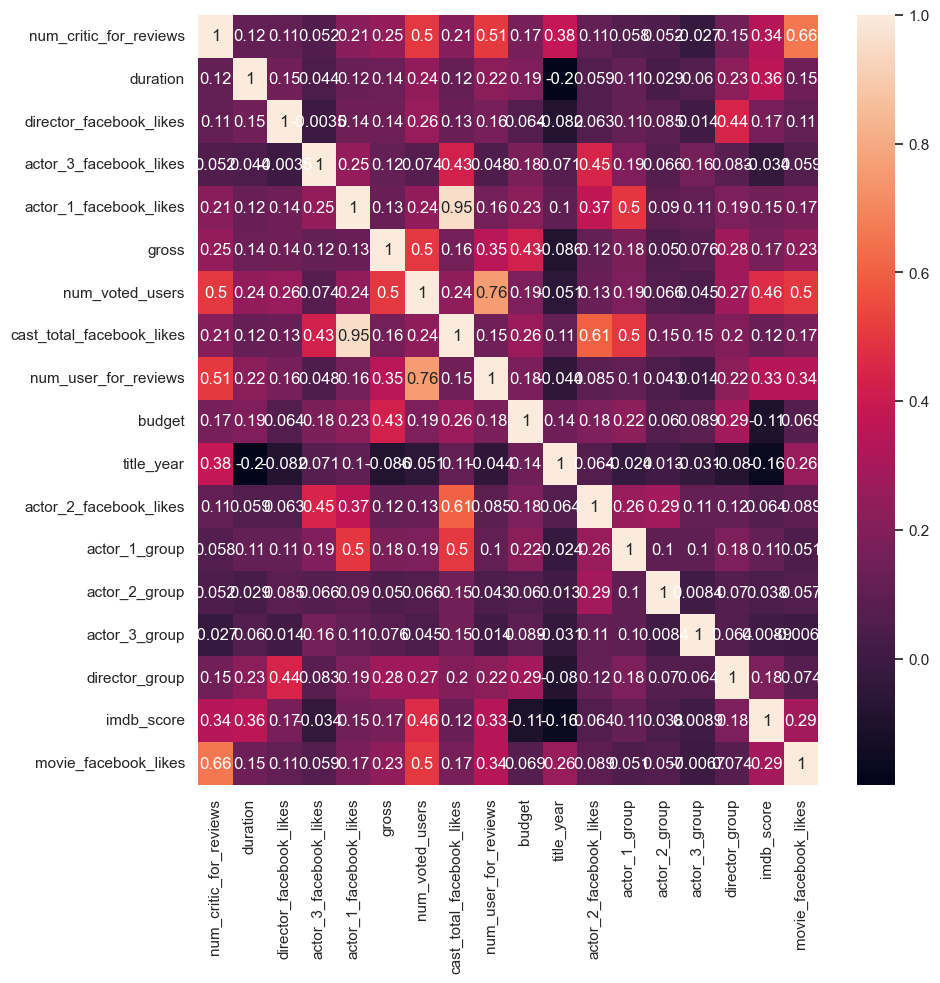

In [416]:
columns = ['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes', 'actor_1_group', 'actor_2_group', 'actor_3_group', 'director_group',
       'imdb_score', 'movie_facebook_likes', ]

heatmap_df = df[columns]

plt.figure(figsize=(10, 10))
corr = heatmap_df.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

c:\Users\Rokas\Desktop\capstone_project\.venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


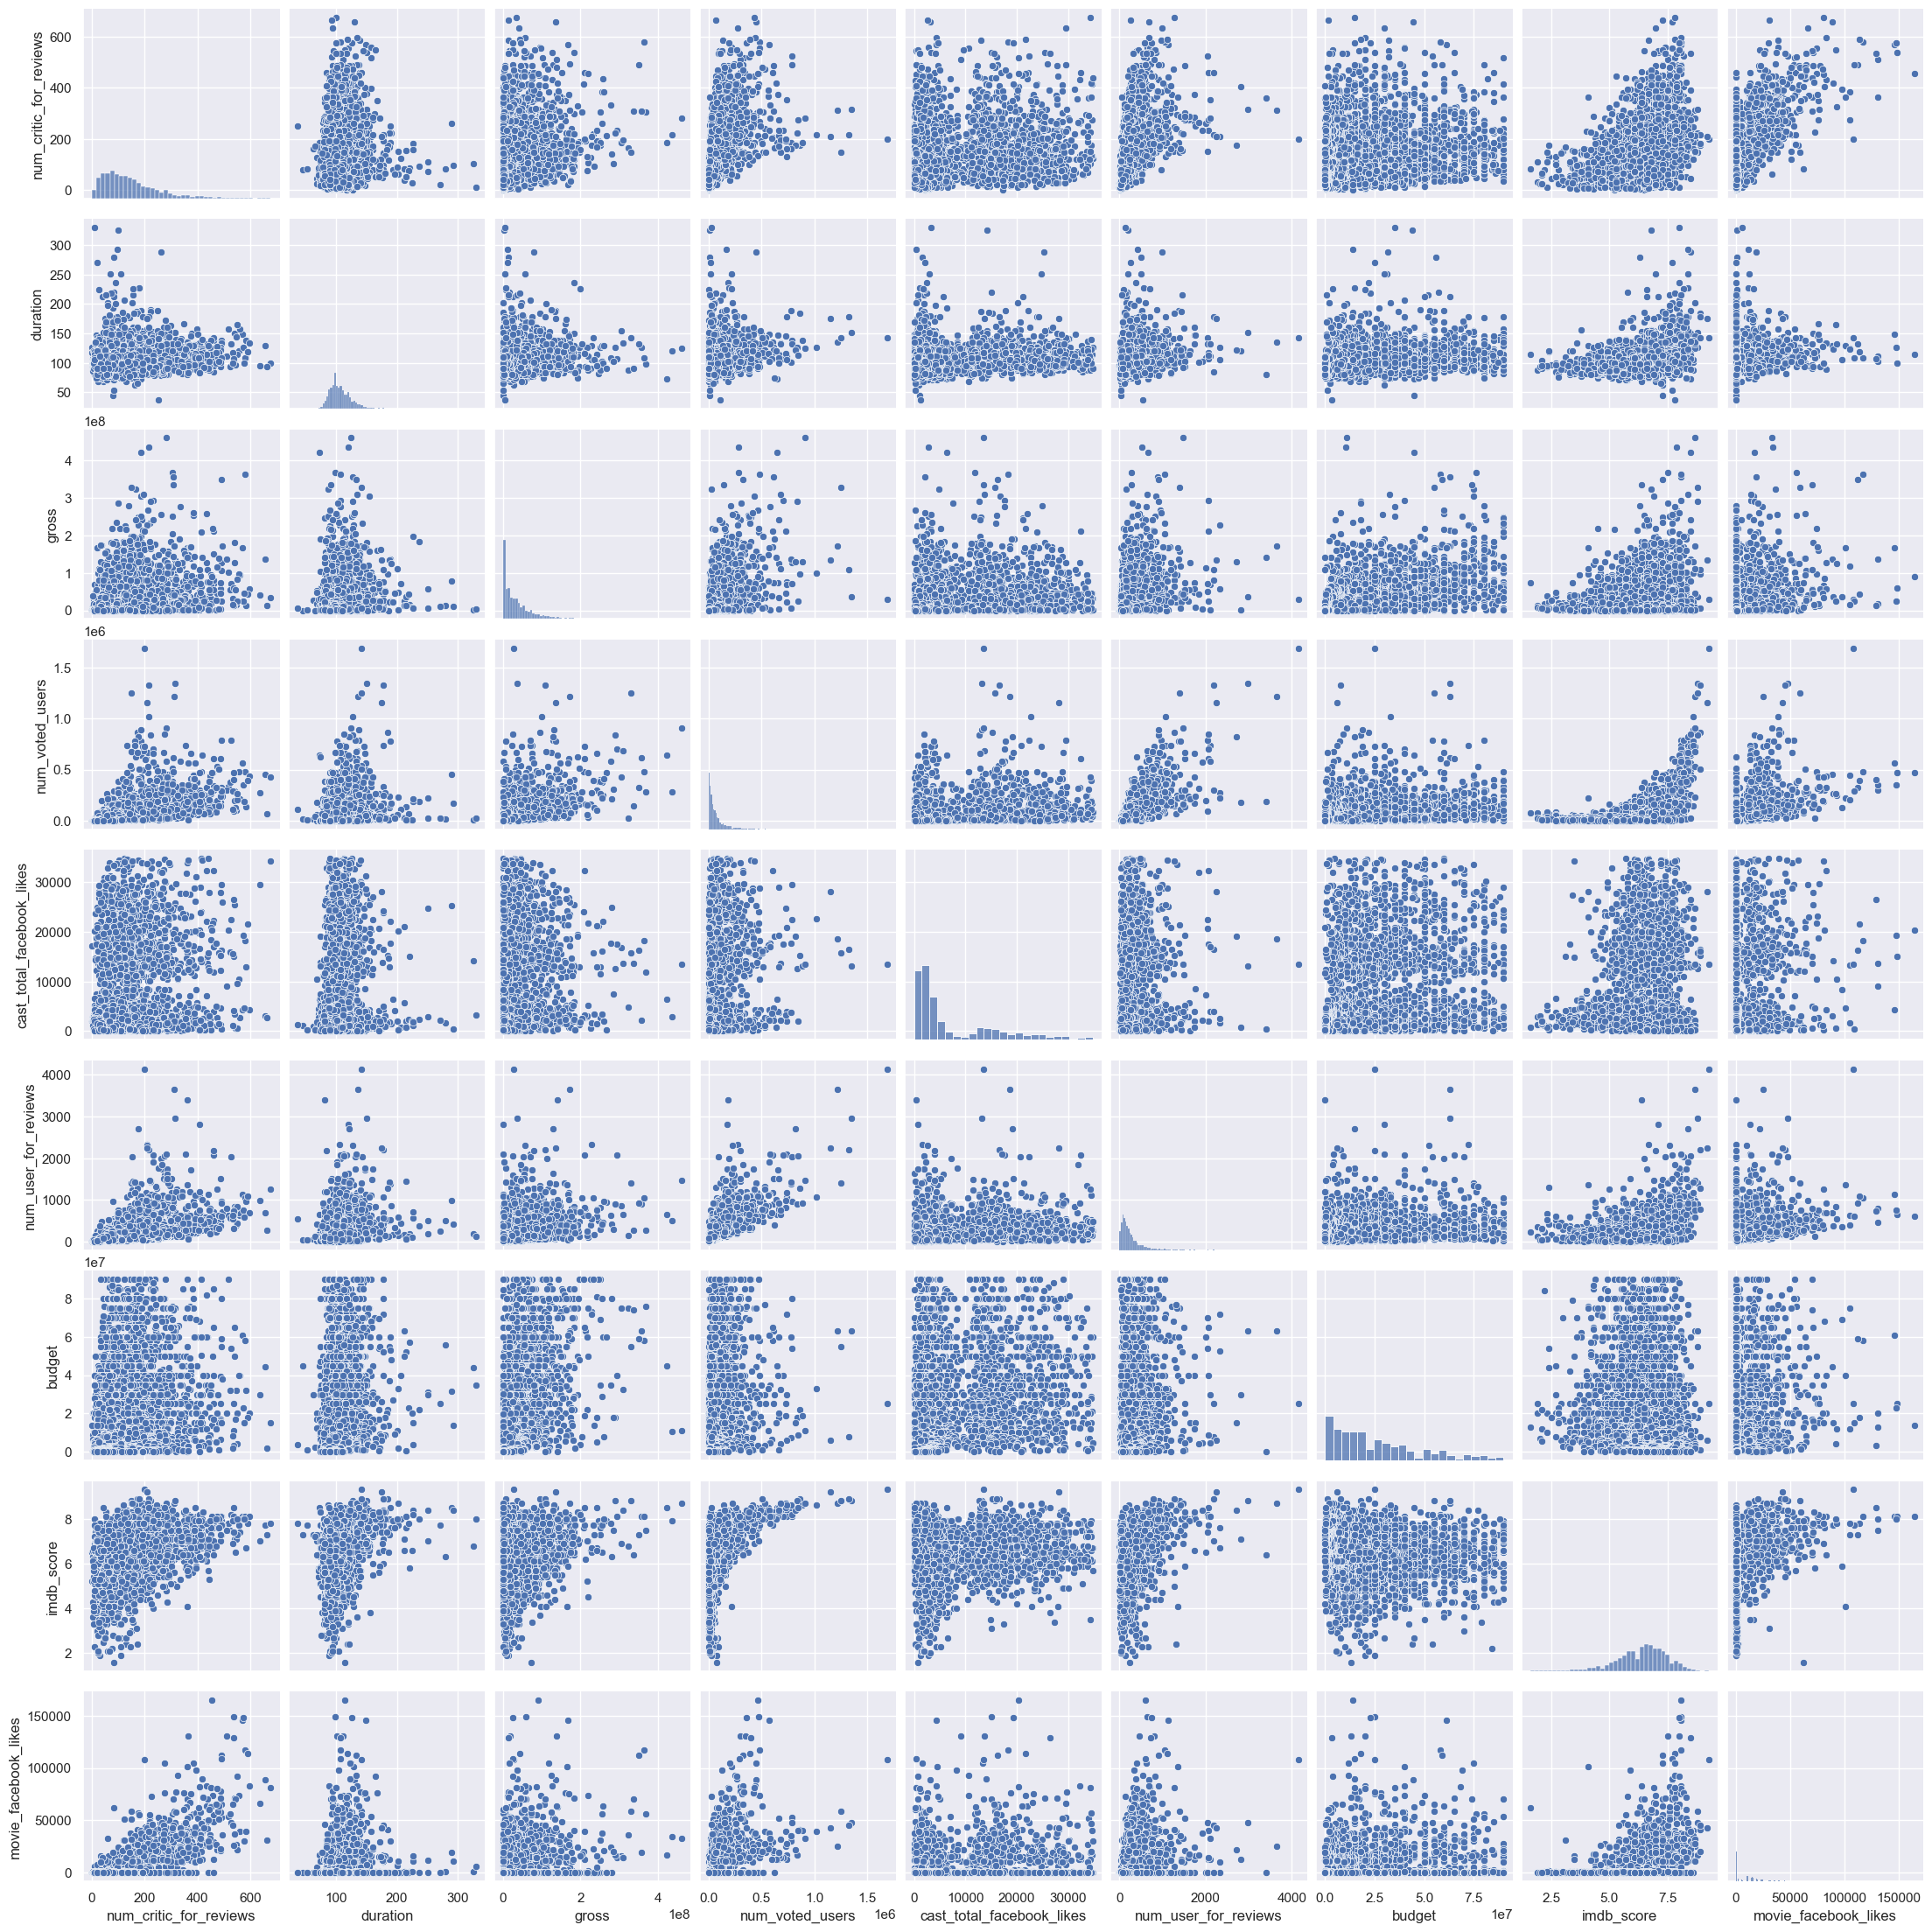

In [105]:
sns.set()
cols = ['num_critic_for_reviews', 'duration',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'budget', 'imdb_score', 'movie_facebook_likes']
sns.pairplot(df[cols], size = 2.5)
plt.show()

# Splitting Data

In [391]:
#clean_df = df.drop(['color', 'director_name', 'genres', 'actor_1_name', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
 #                   'language', 'country', 'movie_title', 'content_rating', 'title_year', 'aspect_ratio', 'actor_2_name', 'director_group'], axis=1)

clean_df = df.drop(['color', 'director_name', 'genres', 'actor_1_name', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
                    'language', 'country', 'movie_title', 'content_rating', 'title_year', 'aspect_ratio', 'actor_2_name', 
                    'actor_3_facebook_likes', 'budget', 'title_year', 'actor_1_group', 'actor_2_group', 'actor_3_group', 'actor_3_facebook_likes',
                    'cast_total_facebook_likes', 'gross', 'director_group', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'director_facebook_likes'
                    ], axis=1)

In [377]:
clean_df.columns

Index(['num_critic_for_reviews', 'duration', 'num_voted_users',
       'num_user_for_reviews', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [378]:
X = clean_df.drop('imdb_score', axis=1)
y = clean_df['imdb_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Data

In [379]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled features back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Initialize a StandardScaler instance for the target variable y
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy(dtype='float32').reshape(-1, 1))

# Device Check

In [380]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# MAPE & RMSE Metrics

In [381]:
# Definining the MAPE metric as a MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

In [382]:
# Define RMSE metric as RMSE function
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Modelling

In [383]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Adding sequence_length dimension
        x = x.unsqueeze(1)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

## Hyperparameters

In [384]:
# Define Hyperparameters
input_size = X_train_scaled.shape[1]
hidden_size = 128
num_layers = 2
output_size = 1
num_epochs = 50
learning_rate = 0.001
batch_size = 96

In [385]:
X_train_numpy = X_train_scaled.to_numpy(dtype='float32')
y_train_numpy = y_train.to_numpy(dtype='float32').reshape(-1, 1)
X_train_tensor = torch.tensor(X_train_numpy)
y_train_tensor = torch.tensor(y_train_scaled)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [386]:
# Initialize Net
model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)

# Define Loss with Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [387]:
# Train and Test
for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device).float()
        targets = targets.to(device).float()

        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs.view(-1, 1)  # Reshape the output tensor
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.6970
Epoch [20/50], Loss: 0.5711
Epoch [30/50], Loss: 0.7414
Epoch [40/50], Loss: 0.5941
Epoch [50/50], Loss: 0.3923


# Evaluation

In [388]:
#LSTM model evaluation
model.eval()
X_test_np = X_test_scaled.to_numpy(dtype=np.float32)
y_test_np = y_test.to_numpy(dtype=np.float32)

X_test_tensor = torch.tensor(X_test_np).to(device)
y_test_tensor = torch.tensor(y_test_np).to(device)

with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = y_pred.cpu().detach().numpy()
y_pred_unscaled = y_scaler.inverse_transform(y_pred)

mse = mean_squared_error(y_test, y_pred_unscaled)
mae = mean_absolute_error(y_test, y_pred_unscaled)
mape = mean_absolute_percentage_error(y_test, y_pred_unscaled)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 0.69
Mean Absolute Error: 0.64
Mean Absolute Percentage Error: 16.610197718406873
